#### 버전문제로 실행이 안되어 버전 변경 필요
- pip install opencv-python==3.4.2.16
- pip install opencv-contrib-python==3.4.2.16

#### 이전코드 오류해결
- contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE) [opencv 4]
-   _ , contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE) [opencv 3]

### 도형검출
    - approx 인덱싱, 그려지는 것 설명 필요
    - 입실론이 달라질 때 꼭지점 개수 적어지는 것 설명하기


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
img_color = cv2.imread("img/tri.jpg", cv2.IMREAD_COLOR)
cv2.imshow('result', img_color)
cv2.waitKey(0)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2.imshow('result', img_gray)
cv2.waitKey(0)

ret,img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('result', img_binary)
cv2.waitKey(0)

_, contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    size = len(cnt)
    print(size)

    epsilon = 0.005 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    size = len(approx)
    print(size)

    #cv2.approxPolyDP결과로 출력되는 좌표 선하나씩 출력해보기
    cv2.line(img_color, tuple(approx[0][0]), tuple(approx[1][0]), (0, 255, 0), 3)
    print(approx[0][0])
    print(approx[1][0])
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    cv2.line(img_color, tuple(approx[1][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    print(approx[1][0])
    print(approx[2][0])
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    
    cv2.line(img_color, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    print(approx[0][0])
    print(approx[2][0])
    cv2.putText(img_color, str(size), (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3, 8)
    cv2.imshow('result', img_color)
    cv2.waitKey(0)
    
    #궁금하니까 출력해보기 
print(approx[:,:,:])
   

# 일반화    
#     cv2.line(img_color, tuple(approx[0][0]), tuple(approx[size-1][0]), (0, 255, 0), 3)
#     for k in range(size-1):
#         cv2.line(img_color, tuple(approx[k][0]), tuple(approx[k+1][0]), (0, 255, 0), 3)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

405
3
[239  58]
[ 79 295]
[ 79 295]
[332 327]
[239  58]
[332 327]
[[[239  58]]

 [[ 79 295]]

 [[332 327]]]


### 예제

In [11]:
img = cv2.imread("img/5shapes.jpg")
cv2.imshow('Input', img)

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

# 컨투어 찾기
_, contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL,  cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # 각 컨투어에 근사 컨투어로 단순화 
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    # 꼭지점의 갯수
    vertices = len(approx)
    print("vertices:", vertices)
    
    # 중심점 찾기
    mmt = cv2.moments(contour)
    cx,cy = int(mmt['m10']/mmt['m00']), int(mmt['m01']/mmt['m00'])
    
    name = "Unkown"
    if vertices == 3: # 꼭지점이 3개는 삼각형
        name = "Triangle"
        color = (0,255,0)
    elif vertices == 4: # 꼭지점 4개는 사각형
        x,y,w,h = cv2.boundingRect(contour)
        if abs(w-h) <= 3:   # 폭과 높이의 차이가 3보다 작으면 정사각형
            name = 'Square'
            color = (0,125,255)
        else:               # 폭과 높이 차이가 3보다 크면 직사각형
            name = 'Rectangle'
            color = (0,0,255)
    elif vertices == 10:  # 꼭 지점 갯수 10개는 별 
        name = 'Star'
        color = (255,255,0)
    elif vertices >= 15: # 꼭 지점 10개 이상이면 원
        name = 'Circle'
        color = (0,255,255)
        
    # 컨투어 그리기    
    cv2.drawContours(img, [contour], -1, color, -1)
    # 도형 이름 출력
    cv2.putText(img, name, (cx-50, cy), cv2.FONT_HERSHEY_COMPLEX_SMALL,1, (100,100,100), 1)

cv2.imshow('Input Shapes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

vertices: 10
vertices: 16
vertices: 3
vertices: 4
vertices: 4


### 문서 스캐너 구현 
Q. 좌표를 찍어주지 않아도 자동으로 스캔 효과를 내는 프로그램 작성

####  Hint
    - (1) 그레이 스케일 -> 가우시안블로로 노이즈 제거 -> 케니 엣지로 경계 검출
    - (2) 경계검출한 이미지에서 컨투어를 찾아 가장 큰 컨투어를 골라 approxPolyDP()  함수로 단순화한 뒤에  꼭지점 4개를 구한다. 
    - (3) approxPolyDP()의 결과값에서 4 x 2 배열로 reshape해서 크기를 조정한다. 

In [35]:
img = cv2.imread("img/paper.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
win_name = "result"
print(img.shape)
emptyBack = np.full(img.shape, 255, np.uint8)

dst = cv2.GaussianBlur(img_gray, (5,5),0) 
edges = cv2.Canny(dst,100,200)


_, contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours:

    epsilon = 0.005 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    print(approx[:][:][0])
    
    vertices = len(approx)
    
    print("vertices:", vertices)
    points = np.array(approx)
    poly = cv2.polylines(emptyBack, [points], True, (0, 0, 255), 4)
    
    # 중심점 찾기
    mmt = cv2.moments(cnt)
    cx,cy = int(mmt['m10']/mmt['m00']), int(mmt['m01']/mmt['m00'])


# 좌표 4개 중 상하좌우 찾기 ---② 

j = 0
k = 0

for i in approx:
    if (cx > i[j][k]) and (cy > i[j][k+1]):
        ulpt = [i[j][k], i[j][k+1]]
    
    elif (cx > i[j][k]) and (cy < i[j][k+1]):
        dlpt = [i[j][k], i[j][k+1]]
        
    elif (cx < i[j][k]) and (cy > i[j][k+1]):
        urpt = [i[j][k], i[j][k+1]]

    elif (cx < i[j][k]) and (cy < i[j][k+1]):
        drpt = [i[j][k], i[j][k+1]]
        
        
print(ulpt,dlpt,urpt,drpt)






orig_pt = np.float32([ulpt,dlpt,drpt,urpt]) # 변환 전 4개 좌표 



rows = img.shape[0]
cols = img.shape[1]

after_pt = np.float32([[0,0], [0,rows], [cols, rows], [cols, 0]])
mtrx = cv2.getPerspectiveTransform(orig_pt, after_pt)




# 변환 후 4개 좌표

result = cv2.warpPerspective(img, mtrx, (cols, rows))

result = cv2.rectangle(result, (0, 0), (cols, rows), (255, 0, 0), 5)

# cv2.imshow("dst", dst)
cv2.imshow("edges", edges)
cv2.imshow("contour", poly)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(782, 586, 3)
[[101  55]]
vertices: 4
[101, 55] [23, 706] [497, 103] [568, 695]


### 문서스캔 (다른 알고리즘)

In [13]:
import cv2
import numpy as np

win_name = 'scan'
# 이미지 읽기
img = cv2.imread("img/paper.jpg")
cv2.imshow('original', img)
cv2.waitKey(0)
draw = img.copy()

# 그레이스 스케일 변환 및 케니 엣지
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0) # 가우시안 블러로 노이즈 제거
edged = cv2.Canny(gray, 75, 200)    # 케니 엣지로 경계 검출
cv2.imshow(win_name, edged)
cv2.waitKey(0)

# 컨투어 찾기
(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# 모든 컨투어 그리기
cv2.drawContours(draw, cnts, -1, (0,255,0))
cv2.imshow(win_name, draw)
cv2.waitKey(0)



print(cnts)
for c in cnts:
    # 영역이 가장 큰 컨투어 부터 근사 컨투어 단순화
    peri = cv2.arcLength(c, True)   # 둘레 길이
    
    vertices = cv2.approxPolyDP(c, 0.02 * peri, True) # 둘레 길이의 0.02 근사값으로 근사화
    if len(vertices) == 4: # 근사한 꼭지점이 4개면 중지
        break
pts = vertices.reshape(4, 2) # N x 1 x 2 배열을 4 x 2크기로 조정
for x,y in pts:
    cv2.circle(draw, (x,y), 5, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
cv2.imshow(win_name, draw)
cv2.waitKey(0)


# 좌표 4개 중 상하좌우 찾기 ---② 
sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

topLeft = pts[np.argmin(sm)]         # x+y가 가장 작은 값이 좌상단 좌표
bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 우하단 좌표
topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표


# 변환 전 4개 좌표 
pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

# 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이

# 변환 후 4개 좌표
pts2 = np.float32([[0,0], [width-1,0], 
                    [width-1,height-1], [0,height-1]])

# 변환 행렬 계산 
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
# 원근 변환 적용
result = cv2.warpPerspective(img, mtrx, (width, height))
cv2.imshow(win_name, result)
cv2.waitKey(0)
cv2.destroyAllWindows()

[array([[[102,  54]],

       [[101,  55]],

       [[101,  56]],

       [[100,  57]],

       [[100,  62]],

       [[ 99,  63]],

       [[ 99,  69]],

       [[ 98,  70]],

       [[ 98,  77]],

       [[ 97,  78]],

       [[ 97,  84]],

       [[ 96,  85]],

       [[ 96,  92]],

       [[ 95,  93]],

       [[ 95,  99]],

       [[ 94, 100]],

       [[ 94, 107]],

       [[ 93, 108]],

       [[ 93, 114]],

       [[ 92, 115]],

       [[ 92, 121]],

       [[ 91, 122]],

       [[ 91, 129]],

       [[ 90, 130]],

       [[ 90, 136]],

       [[ 89, 137]],

       [[ 89, 144]],

       [[ 88, 145]],

       [[ 88, 152]],

       [[ 87, 153]],

       [[ 87, 160]],

       [[ 86, 161]],

       [[ 86, 168]],

       [[ 85, 169]],

       [[ 85, 176]],

       [[ 84, 177]],

       [[ 84, 184]],

       [[ 83, 185]],

       [[ 83, 192]],

       [[ 82, 193]],

       [[ 82, 201]],

       [[ 81, 202]],

       [[ 81, 208]],

       [[ 80, 209]],

       [[ 80, 217]],

       [[

# Matching and Tracking

### 평균 해시 매칭 
: 픽셀 전체의 평균 값을 구해서 각 픽셀의 값이 평균보다 작으면 0, 크면 1로 바꿉니다. 

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


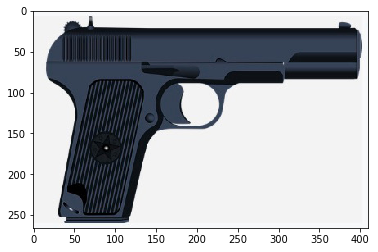

In [15]:
import cv2
from matplotlib import pyplot as plt

#영상 읽어서 그레이 스케일로 변환
img = cv2.imread('img/pistol.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 16x16 크기로 축소 ---①
gray = cv2.resize(gray, (16,16))
# 영상의 평균값 구하기 ---②
avg = gray.mean()
# 평균값을 기준으로 0과 1로 변환 ---③
bin = 1 * (gray > avg)
print(bin)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 유사도 측정방법
    (1) 유클리드 거리 : 두 값의 차이 (높은 자리가 다를 수록 더 큰거리)
    (2) 해밍거리 : 길이가 같을 때 자리 값이 서로 다른 것이 몇개인지 ( 각 자리수의 차이의 개수 비교 )
        ex) 12345와 123(54)가 있을 때 해밍 거리가 '2'

In [12]:
import cv2
import numpy as np
import glob

# 영상 읽기 및 표시
img = cv2.imread('img/pistol.jpg')
cv2.imshow('query', img)

# 비교할 영상들이 있는 경로 ---①
search_dir = 'img'

# 이미지를 16x16 크기의 평균 해쉬로 변환 ---②
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# 해밍거리 측정 함수 ---③
def hamming_distance(a, b):
    a = a.reshape(1,-1) # "-1" 자동으로 차원선정
    b = b.reshape(1,-1)
    # 같은 자리의 값이 서로 다른 것들의 합
    distance = (a !=b).sum()
    return distance

# 권총 영상의 해쉬 구하기 ---④
query_hash = img2hash(img)

# 이미지 데이타 셋 디렉토리의 모든 영상 파일 경로 ---⑤
img_path = glob.glob(search_dir+'/**/*.jpg')
for path in img_path:
    # 데이타 셋 영상 한개 읽어서 표시 ---⑥
    img = cv2.imread(path)
    cv2.imshow('searching...', img)
    cv2.waitKey(5)
    # 데이타 셋 영상 한개의 해시  ---⑦
    a_hash = img2hash(img)
    # 해밍 거리 산출 ---⑧
    dst = hamming_distance(query_hash, a_hash)
    if dst/256 < 0.25: # 해밍거리 25% 이내만 출력 ---⑨
        print(path, dst/256)
        cv2.imshow(path, img)
cv2.destroyWindow('searching...')
cv2.waitKey(0)
cv2.destroyAllWindows()

img\BACKGROUND_Google\image_0398.jpg 0.234375
img\binocular\image_0011.jpg 0.23828125


KeyboardInterrupt: 

### 견본을 이용한 객체검출

* result = cv.matchTemplate(img, temp, method)
    - img : 입력영상
    - temp : 템플릿 영상
    - method : 매칭 메서드(SQDIFF를 제외하고는 높을 수록 좋은 매칭)
        - cv2.TM_SQDIFF : 제곱 차이 매칭 ( 낮을 수록 좋은 매칭 )
        - cv2.TM_SQDIFF_NORMED : 제곱 차이 정규화 (낮을 수록 좋은 매칭 )
        - cv2.TM_CCORR : 상관관계 매칭 (0 ~ )
        - cv2.TM_CCORR_NORMED : 상관관계 매칭의 정규화
        - cv2.TM_CCOEFF (-1 ~ 1 )
    - result : 매칭 결과(2차원 배열)
    
* minVal, maxVal, minLoc, maxLoc, MaxLoc = cv2.minMaxLoc(src) 
: 매칭 결과를 바탕으로 결과값이 출력
    - src : 입력
    - minVal, maxVal(최대, 최소)
    - minLoc, maxLoc (최소 값과 최대 값의 좌표)        

In [4]:
img = cv2.imread('img/figures.jpg')
template = cv2.imread('img/taekwonv1.jpg')
th, tw = template.shape[:2]
cv2.imshow('template', template)

# 3가지 매칭 메서드 순회
methods = ['cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', \
                                     'cv2.TM_SQDIFF_NORMED']
for i, method_name in enumerate(methods):
    img_draw = img.copy()
    method = eval(method_name)
    # 템플릿 매칭   ---①
    res = cv2.matchTemplate(img, template, method)

    # 최대, 최소값과 그 좌표 구하기 ---②
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(method_name, min_val, max_val, min_loc, max_loc)

    # TM_SQDIFF의 경우 최소값이 좋은 매칭, 나머지는 그 반대 ---③
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        match_val = min_val
    else:
        top_left = max_loc
        match_val = max_val
    # 매칭 좌표 구해서 사각형 표시   ---④      
    bottom_right = (top_left[0] + tw, top_left[1] + th)
    cv2.rectangle(img_draw, top_left, bottom_right, (0,0,255),2)
    # 매칭 포인트 표시 ---⑤
    cv2.putText(img_draw, str(match_val), top_left, \
                cv2.FONT_HERSHEY_PLAIN, 2,(0,255,0), 1, cv2.LINE_AA)
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)) #-- for Mac
    #plt.show()  #-- for Mac
    cv2.imshow(method_name, img_draw)
cv2.waitKey(0)
cv2.destroyAllWindows() 

cv2.TM_CCOEFF_NORMED -0.1780252307653427 0.5131933093070984 (42, 0) (208, 43)
cv2.TM_CCORR_NORMED 0.827332615852356 0.9238022565841675 (85, 6) (208, 43)
cv2.TM_SQDIFF_NORMED 0.17028295993804932 0.36860838532447815 (208, 43) (86, 7)


## Key point (특징점),  Descriptor

**1. Key point는 영상의 특징이 있는 픽셀의 좌표와 그 주변 픽셀과의 관계에 대한 정보를 가진다.**

- pt(x, y coordinate) , size(keypoint diameter), angle(keypoint orientation), response(keypoint detector response on the keypoint (that is, strength of the keypoint)), octave(pyramid octave in which the keypoint has been detected)
- 물체의 형태나 크기, 위치가 변해도 쉽게 식별이 가능하면 좋음
- 카메라의 시점, 조명이 변해도 영상에서 해당 지점을 쉽게 찾아낼 수 있으면 좋음
     - pt(x, y coordinate)
     - size(keypoint diameter)
     - angle(keypoint orientation) -> 시계방향, -1 = 의미없음
     - response(keypoint detector response on the keypoint (that is, strength of the keypoint)) -> Detector에 따라 상이
     - octave(pyramid octave in which the keypoint has been detected)
     - class_id : key point가 속한 object ID
  
**2. Descriptor는 key point 주변 픽셀을 일정한 크기의 블록으로 나누어 key point 주위의 정보를 표현** 
    - Way to compare the keypoints. it assigns a numerical description to the area of the image the keypoint refers to.
    - Independent of keypoint position, Robust against image transformations, Scale independent

|  &nbsp;                         |  &nbsp;                         |
| --------------------            | -----------------               |
|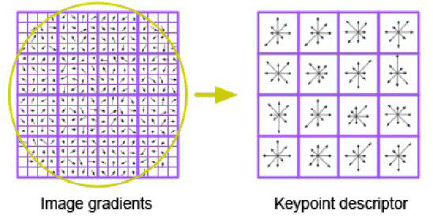 | 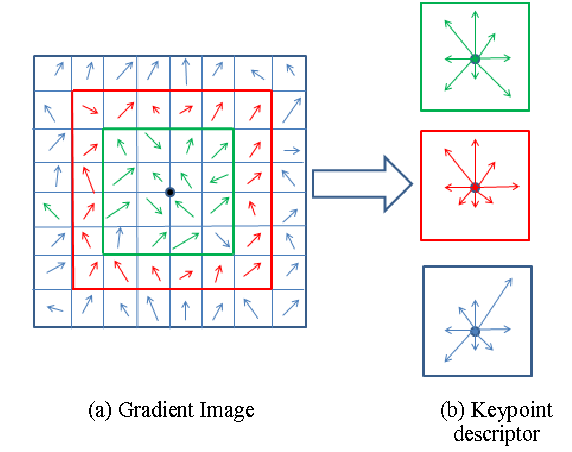|

1. 특징점을 중심으로 16x16 영역을 4x4 크기의 16개 윈도우로 나눈다.
2. 윈도우의 16개 포인트에서 그레디언트 벡터의 크기와 방향을 계산한다.
3. 그레디언트 벡터의 방향을 8개의 각도로 라운딩(rouding)한다.
4. 8개의 각도에 대해 그레디언트 벡터의 크기를 더하여 일종의 그레디언트 히스토그램을 만든다.
5. 윈도우 16개의 히스토그램을 모두 모으면, 특징점 주변에 대한 정보가 128(8 x 16)차원의 벡터로 표현된다.

## Feature Detector

- Low-level feature: edge, corner, color

- Mid-level feature: edge junction

- High-level feature: object의 일부분이나 전체 object

### 1. Corner Detector

#### 1) Harris Edge Detector

: 소벨 미분으로 엣지를 검출하여, 엣지의 경사도 변화량을 측정하여 변화량이 X,Y축 크게 변화하는 것을 코너로 판단
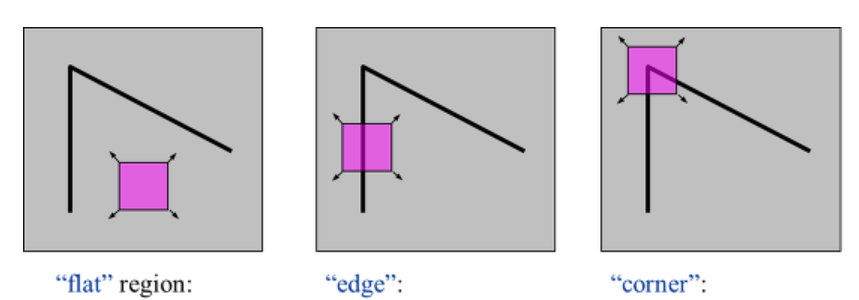

* dst = cv.cornerHarris(src, blockSize, ksize, k)
    - src : 입력 영상, 그레이 스케일 
    - blockSize : 이웃 픽셀 범위
    - ksize : 소벨 미분 커널 크기
    - k : 코너 검출 상수 (0.04 ~ 0.06)
    - dst : 코너 검출 결과 (변화량의 값)

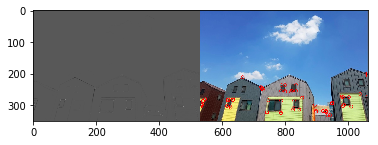

In [30]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corner = cv2.cornerHarris(gray, 2, 3, 0.04) 

# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1 * corner.max()) #np.where 원하는 원소의 index 출력
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기 ---③
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))


cv2.imshow('Harris Corner', merged)
cv2.waitKey()
cv2.destroyAllWindows()

#### 2) Good Features to Track (CVPR94)   &nbsp; &nbsp; &nbsp;-> &nbsp; Determines strong corners on an image.

cv2.goodFeaturesToTrack(img, maxCorners, qualitLevel, minDistance)
    - maxCorners : 얻고 싶은 코너 개수 (강한 순)
    - qualityLevel : 코너로 판단할 threshold
    - minDistance : 코너간 최소거리 
    - cornes : 코너 검출 좌표 결과 (실수 값으로 정수로 변형 필요)

In [4]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


corners = cv2.goodFeaturesToTrack(gray, 80, 0.01, 10)

# 실수 좌표를 정수 좌표로 변환
corners = np.int32(corners)

# 좌표에 동그라미 표시
for corner in corners:
    x, y = corner[0]
    cv2.circle(img, (x, y), 5, (0,0,255), 1, cv2.LINE_AA)

 
cv2.imshow('Corners', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 2. Key points Detector + Descriptor Extractor

* **keypoints = *detector*.detect(img)** : 키 포인트 검출 함수 
    - img : 입력 영상, 바이너리 스케일
    - keypoints : 특징점 검출 결과 (리스트)
  
  
* **keypoints, descriptors = *detector*.detectAndCompute(image, mask)** : 키 포인트 검출과 특징 디스크립터 계산을 한번에 수행
    - image : 입력 영상
    - mask: 키포인트 검출에 사용할 마스크
    - keypoints : 디스크립터 계산을 위해 사용할 키 포인트
    - descriptors : 계산된 디스크립터 
  
  
* **outImg = cv2.drawKeypoints(img, keypoints, outImg[,color[,flags]])** : 검출 포인트를 표시 
    - img : 입력이미지
    - keypoints : 표시할 키 포인트 리스트
    - outImg : 키 포인트가 그려진 결과 이미지
    - color : 표시할 색상(기본값 랜덤)
    - flags : 표시 방법 선택 플래그 
        - cv2.DRAW_MATCHES_FLAGS_DEFAULT : 좌표 중심에 동그라미만 그림
        - cv2.DRAW_MATCHS_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미의 크기를 size와 angle 반영

### GFTT Detector

In [1]:
img = cv2.imread("img/house.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


gftt = cv2.GFTTDetector_create()
keypoints = gftt.detect(gray, None)

img_draw = cv2.drawKeypoints(img, keypoints, None)

 
cv2.imshow('GFTTDectector', img_draw)

cv2.waitKey(0)
cv2.destroyAllWindows()

### FAST (Features from Accelerated Segment Test)

한 픽셀 p를 중심으로 하는 3픽셀의 반지름을 가지는 원을 만들고, 그 원 위의 16개의 픽셀 값을 보고 코너를 찾는다.
p 보다 기준값 이상 밝거나, 어두운 픽셀들이  n 개 이상 연속적으로 존재하면  p 를 Corner로 판단한다.
n 에 따라 FAST-9, FAST-10, FAST-11, FAST-12 등의 여러 버전이 가능하다. 픽셀의 순서를 어떻게 하느냐에 따라서도 추출되는 코너가 바뀔 수 있다는 등등의 이유로 FAST에서는 그냥 숫자를 세어 코너를 판단하는 것이 아니라, Decision Tree를 이용해서 코너인가 아닌가를 판단한다. 이때, 16개의 픽셀은 기준값으로  p 보다 기준값이상 큰,  p 보다 기준값이상 작은,  p 와 유사한 밝기로 바꾸어 16차원의 벡터로 표현하고, 모든 픽셀, 모든 이미지에 대한 벡터를 쌓아 훈련시킨다. 이 때 타겟값은 특징점인지 아닌지인데, 이는 라벨링을 해주어야 한다. 
  
또하나의 문제점은 한 점이 코너로 판단되면, 주변의 픽셀 또한 코너로 인식되는데, 이는 non-maximal suppression라는 후처리 작업으로 해결했다. 코너성을 대변하는 수치를 계산하고 이를 기준으로 인접 픽셀에 대해 가장 높은 코너성 수치를 가지는 픽셀만 코너로 선택하는 것이다.

In [3]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fast = cv2.FastFeatureDetector_create(50) # 코너 판단 임계값 : 50
keypoints = fast.detect(gray, None)

img = cv2.drawKeypoints(img, keypoints, None)


cv2.imshow('FAST', img)
cv2.waitKey()
cv2.destroyAllWindows()

### SimplBlobDetector
: 자잘한 객체는 노이즈로 판단하고 특정 크기 이상의 큰 객체에만 관심을 두는 방법

In [ ]:
img = cv2.imread("img/house.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(gray)

# 키 포인트를 빨간색으로 표시
img = cv2.drawKeypoints(img, keypoints, None, (0,0,255),\
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 동그라미 크기를 사이즈와 angle 반영


cv2.imshow("Blob", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### SIFT
SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

1. 먼저 크기에 불변한 특징점을 추출하기 위해서, 스케일 피라미드(Scale-Pyrimid)를 만든다. 스케일 피라미드란 이미지의 원본 이미지에서 2배, 1배, 1/2배, 1/4배 점차 줄인 이미지이다.이렇게 만든 스케일 피라미드의 각 이미지에서 특징점을 찾는다. 이렇게 찿은 특징점은 스케일 불변(Scale-Invariant)이다. 하지만 이미지의 회전에는 불변이 아니다.
2. 회전 불변 특성을 위해 특징점 주변의 그레디언트 방향과 크기를 수집한다. 특징점을 중심으로 윈도우를 설정하여 그 안의 픽셀에 대한 그레디언트의 크기와 방향을 구한다.
3. 360도를 36등분하여 36개의 bin을 가진 그레디언트 벡터 히스토그램을 만든다. 가장 값이 큰 bin이 해당 특징점의 방향, 그 bin의 크기가 특징점의 크기가 된다.

In [54]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


sift = cv2.xfeatures2d.SIFT_create()

keypoints, descriptor = sift.detectAndCompute(gray, None)
print('keypoint:',len(keypoints), 'descriptor:', descriptor.shape)
# print(descriptor)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


cv2.imshow('SIFT', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

keypoint: 413 descriptor: (413, 128)


### SURF 
 -> SURF(Speeded-Up Robust Features)는 인텐서티 계산 방법을 간략화 하는 등의 방법으로 SIFT 방법의 속도와 안정성을 개선한 것

In [51]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성 ( hessianThreshold : 특징 추출 경계 값(1000), n0ctaves : 이미지 피라미드 계층 수 (3))
surf = cv2.xfeatures2d.SURF_create(1000, 3)

keypoints, desc = surf.detectAndCompute(gray, None)
print(desc.shape, desc)


img_draw = cv2.drawKeypoints(img, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SURF', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

(253, 64) [[-1.41381612e-03  1.54175982e-03  4.62181121e-03 ... -1.55561406e-03
   3.46733583e-03  3.80801107e-03]
 [ 2.16470612e-03 -4.75252513e-04  2.41602724e-03 ...  3.69785586e-04
   1.73354778e-03  9.68112552e-04]
 [ 4.88907890e-03 -5.32377686e-04  5.16193081e-03 ... -4.30460495e-04
   1.65855233e-03  8.13954917e-04]
 ...
 [ 3.04325600e-04  2.36827182e-05  1.86359545e-03 ... -5.30764228e-04
   1.12827413e-03  7.64863158e-04]
 [-1.12825415e-04  2.61629957e-05  2.42092094e-04 ... -5.81204367e-04
   1.18061574e-03  6.25324086e-04]
 [-1.16742598e-02 -1.76841277e-03  1.17120687e-02 ... -1.56724534e-04
   1.51467673e-03  3.98358854e-04]]


### ORB
ORB(Oriented FAST and Rotated BRIEF)는 위에서 배운 FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 
SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘

SIFT에서 하나의 특징점에 대한 정보(설명자)는 128차원의 실수 벡터이다. 이는 꽤 많은 메모리를 사용하고, 어쩌면 실제로 특징점을 매칭할 때, 모두 필요하지 않을 수도 있다. 이러한 잠재적인 리소스 낭비를 방지하기 위해서 BRIEF는 설명자 벡터를 특징점의 픽셀값을 기준으로 바이너리 값으로 나타낸다. BRIEF는 실제로 이미지에 매칭 하는 기능을 제공하는 것이 아니라, 이미지를 매칭할 때 사용되는 메모리를 절약하기 위한 설명자 표현법이다.

1. 먼저, FAST로 특징점을 찾고, Harris corner dectection에서 사용하는 코너에 대한 정량적인 값을 기준으로 가장 코너성이 큰  N 개의 코너를 선택한다.
2. SIFT에서 설명한 스케일 피라미드를 만들어 똑같이 특징점을 추출하고 여러 스케일에 대한 특징점을 찾는다.
3. 다음으로 찾아낸 코너의 방향을 알기 위해서, 한 윈도우 안에서 Intesity Centroid라는 것을 계산 한다. 특징으로 추출된(코너) 픽셀을 중심으로 윈도우를 형성하고, 중심에 있는 코너로 부터 계산한 Intesity Centroid의 방향이 코너의 방향성을 대변한다.
4. 설명자로 BRIEF를 사용하고자 했지만, BRIEF는 방향에 대한 정보를 가지지 않기 때문에, steer-BRIEF라는 것을 사용한다.
5. 또한, steer-BRIEF는 벡터의 분산값이 작기 때문에, 평균은 그대로 두고, 높은 분산값을 가지게 하는 과정을 거친다. 이렇게 많든 BRIEF를 rBRIEF 라고 한다.
5. 실제로 이미지를 매칭할 때는 multi-probe LSH(Locality Sensetive Hashing)를 사용한다.

In [11]:
img = cv2.imread('img/house.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


orb = cv2.ORB_create()
keypoints, descriptor = orb.detectAndCompute(img, None)

img_draw = cv2.drawKeypoints(img, keypoints, None, \
             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


cv2.imshow('ORB', img_draw)
cv2.waitKey()
cv2.destroyAllWindows()

## Matching and Tracking with Detector
-> Detector에서 생성된 key point, descriptor를 활용하여 matching

* DMatch : 매칭 결과를 표현하는 객체  -> *matcher*.match의 결과물
    - queryIdx : queryDescriptor의 인덱스 
    - trainIdx : trainDescriptor의 인덱스
    - imgIdx : 이미지 인덱스 
    - distance : 유사도 거리 

### BFMatcher와 SIFT/SURF/ORB 로 매칭
**cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)**
    - normType : 거리 측정 알고리즘
        - cv2.NORM_L1 : 절대값 차 (SIFT, SURF)
        - cv2.NORM_L2 : 제곱합의 루트 (SIFT, SURF) , 기본값
        - cv2.NORM_L2SQR : 제곱합 (SIFT, SURF)
        - cv2.NORM_HAMMING (ORB)
        - cv2.NORM_HAMMING2 (ORB)
        
    - crossCheck=True : 상호 매칭이 있는 것만 반영
     

In [12]:
img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = cv2.xfeatures2d.SIFT_create()
detector2 = cv2.xfeatures2d.SURF_create()
detector3 = cv2.ORB_create()

# 각 영상에 대해 key point, descriptor 추출 
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

kp3, desc3 = detector2.detectAndCompute(gray1, None)
kp4, desc4 = detector2.detectAndCompute(gray2, None)

kp5, desc5 = detector3.detectAndCompute(gray1, None)
kp6, desc6 = detector3.detectAndCompute(gray2, None)

# BFMatcher object 생성
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)


# 매칭 계산 
matches = matcher.match(desc1, desc2)
matches2 = matcher.match(desc3, desc4)
matches3 = matcher.match(desc5, desc6)

# 매칭 결과 그리기 
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res2 = cv2.drawMatches(img1, kp3, img2, kp4, matches2, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res3 = cv2.drawMatches(img1, kp5, img2, kp6, matches3, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# result = np.vstack((res,res2,res3))

cv2.imshow('BFMatcher + SIFT', res1)
cv2.imshow('BFMatcher + SURF', res2)
cv2.imshow('BFMatcher + ORB', res3)
cv2.waitKey()
cv2.destroyAllWindows()

### FLANN (Fast Library for Approximate Nearest Neighbors)
 : Brute-force 방식인 BFMatcher에 비해 빠름 (큰 용량의 영상에 사용, match결과가 BFMatcher보다 안좋을 수 있음)

인덱스 파라미터에 값을 조금만 잘못 지정해도 매칭에 실패하고 오류가 발생하여 OpenCV튜토리얼 문서에서 아래와 같이 인덱스 파라미터 설정을 권장

    (1) SIFT or SURF
        - FLANN_INDEX_KDTREE = 1
        - index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    
    (2) ORB를 사용하는 경우 
        FLANN_INDEX_LSH = 6
        - index_params= dict(algorithm = FLANN_INDEX_LSH,
                             table_number = 6,
                             key_size = 12,
                             multi_probe_level = 1)

### FLANNMatcher와 SITF/SURF/ORB 로 매칭

In [68]:
img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = cv2.xfeatures2d.SIFT_create()
detector2 = cv2.xfeatures2d.SURF_create()
detector3 = cv2.ORB_create()


kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

kp3, desc3 = detector2.detectAndCompute(gray1, None)
kp4, desc4 = detector2.detectAndCompute(gray2, None)

kp5, desc5 = detector3.detectAndCompute(gray1, None)
kp6, desc6 = detector3.detectAndCompute(gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정 
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

FLANN_INDEX_LSH = 6
index_params_orb= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)

search_params = dict(checks=50) # 검색할 후보 수

# Flann Matcher object 생성 
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matcher2 = cv2.FlannBasedMatcher(index_params_orb, search_params)


matches = matcher.match(desc1, desc2)
matches2 = matcher.match(desc3, desc4)
matches3 = matcher2.match(desc5, desc6)

res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res2 = cv2.drawMatches(img1, kp3, img2, kp4, matches2, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res3 = cv2.drawMatches(img1, kp5, img2, kp6, matches3, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Flann + SIFT', res)
cv2.imshow('Flann + SURF', res2)
cv2.imshow('Flann + ORB', res3)
cv2.waitKey()
cv2.destroyAllWindows()

## 좋은 매칭점 찾기
: 결과에서 쓸모 없는 매칭점은 버리고 좋은 매칭점만을 골라내는 작업 필요

### 1) Full match
Finds the best match for each descriptor
  
이후 전체 match 결과를 기준으로 각 matcing point의 거리차이가 지정한 threshold value 아래인 것만 추출

In [3]:
img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)


matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x:x.distance)              # 매칭 결과를 거리기준 오름차순으로 정렬 
min_dist, max_dist = matches[0].distance, matches[-1].distance  # 최소 거리 값과 최대 거리 값 확보 
ratio = 0.2                                                     # 최소 거리의 20% 지점을 임계점으로 설정
good_thresh = (max_dist - min_dist) * ratio + min_dist
good_matches = [m for m in matches if m.distance < good_thresh]

print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))

res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Good Match', res)
cv2.waitKey()
cv2.destroyAllWindows()

matches:30/240, min:25.00, max:92.00, thresh:38.40


### 2) KNN match
Finds the k(or less) best matches for each descriptor

In [45]:
img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)


matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
matches = matcher.knnMatch(desc1, desc2, 2)

# 하나의 descriptor에서 추출된 2개의 matching point 중 첫번째의 유사도 거리가 두번째의 유사도 거리*ratio 보다 작을 때 선별
# 즉, 근처에도 근사하게 매칭 된 것이 있어야 matching point를 선별한다는 의미

ratio = 0.85
good_matches = [first for first,second in matches if first.distance < second.distance * ratio]


print('matches:%d/%d' %(len(good_matches),len(matches)))


res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)


cv2.imshow('Matching', res)
cv2.waitKey()
cv2.destroyAllWindows()

matches:58/500


### 매칭 영역 원근 변환
    (1) 좋은 매칭점으로만 구성된 매칭점 좌표들로 두 영상 간의 원근 변환행렬을 구하면 찾는 물체가 영상어디에 있는지 표시할 수 있습니다.
    
    (2) 원근 변환행렬에 맞지 않는 매칭점을 구분할 수 있어 나쁜 매칭점을 또 한번 제거

* mtrx, mask = cv.findHomograpy(srcPoints, dstPoints)
: 여러개의 점으로 근사 계산한 원근 변환행렬을 반환
    - srcPoint : 원본 좌표 배열
    - dstPoint : 결과 좌표 배열 
    - mtrx : 결과 행렬
    - mask : 정상치 판별결과, N X 1행 배열 ( 0 : 비정상치, 1: 정상치)
* dst = cv.perspectiveTransform(src, m)
: 이동할 새로운 좌표배열을 반환
    - src : 입력 좌표 배열
    - m : 변환 행렬
    - dst : 출력 좌표 배열

In [32]:
img1 = cv2.imread('img/taekwonv1.jpg')
img2 = cv2.imread('img/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
matches = matcher.knnMatch(desc1, desc2, 2)


ratio = 0.75
good_matches = [first for first,second in matches if first.distance < second.distance * ratio]
print('good matches: {0:d}/{1:d}'.format(len(good_matches),len(matches)))

# good_matches의 queryIdx로 img1 의 key point 좌표 구하기 ---③
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
   
# good_matches의 trainIdx로 img2의 key point 좌표 구하기 ---④
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])

# 원근 변환 행렬 구하기 
mtrx, mask = cv2.findHomography(src_pts, dst_pts)

# img1 크기를 기반으로 비틀어줄 vertex 좌표 생성
h,w = img1.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])

# img1의 각 vertex에 이미 구해논 homography(projective transform) 적용
dst = cv2.perspectiveTransform(pts,mtrx)

# img1의 변환된 vertex들을 img2에 표시
img2 = cv2.polylines(img2,[np.int32(dst)], True,255,3, cv2.LINE_AA)


res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('Matching Homography', res)
cv2.waitKey()
cv2.destroyAllWindows()

good matches: 26/500


## 파노라마 사진 생성

In [7]:
import cv2 
import numpy as np

img_src = cv2.imread('img/restaurant2.jpg')
img_dst = cv2.imread('img/restaurant1.jpg')
gray_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
gray_dst = cv2.cvtColor(img_dst, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
h, w = img_src.shape[0], img_src.shape[1]

#-------------------------------------------------------------------------------#
#------------------------ Forward stitching ------------------------------------#
#-------------------------------------------------------------------------------#

kp1, desc1 = detector.detectAndCompute(gray_src, None)
kp2, desc2 = detector.detectAndCompute(gray_dst, None)

matches = matcher.knnMatch(desc1, desc2, k=2)

ratio = 0.75
good_matches = [first for first,second in matches if first.distance < second.distance * ratio]
print('good matches: {0:d}/{1:d}'.format(len(good_matches),len(matches)))

pts_src = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
pts_dst = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])

HG, mask = cv2.findHomography(pts_src, pts_dst, cv2.RANSAC)

vert_src = np.float32([ [[0,0]],[[0,h]],[[w,h]],[[w,0]] ])
vert_src_trans = cv2.perspectiveTransform(vert_src,HG) 

cols = img_src.shape[1] + img_dst.shape[1]
rows = img_src.shape[0]
result = cv2.warpPerspective(img_src, HG, (cols, rows))
trans_src = result.copy()
trans_src = cv2.polylines(trans_src,[np.int32(vert_src_trans)],True,255,3, cv2.LINE_AA)

result[0:img_dst.shape[0], 0:img_dst.shape[1]] = img_dst

#-------------------------------------------------------------------------------#
#------------------------ Reverse stitching ------------------------------------#
#-------------------------------------------------------------------------------#

img_src2 = img_dst.copy() # left
img_dst2 = img_src.copy() # right
gray_src2 = cv2.cvtColor(img_src2, cv2.COLOR_BGR2GRAY)
gray_dst2 = cv2.cvtColor(img_dst2, cv2.COLOR_BGR2GRAY)


kp3, desc3 = detector.detectAndCompute(gray_src2, None)
kp4, desc4 = detector.detectAndCompute(gray_dst2, None)


matches_rev = matcher.knnMatch(desc3, desc4, k=2)

ratio_rev = 0.75
good_matches_rev = [first for first,second in matches_rev if first.distance < second.distance * ratio_rev]
print('good matches_rev: {0:d}/{1:d}'.format(len(good_matches_rev),len(matches_rev)))

pts_src2 = np.float32([ kp3[m.queryIdx].pt for m in good_matches_rev ])
pts_dst2 = np.float32([ kp4[m.trainIdx].pt for m in good_matches_rev ])

HG2, mask2 = cv2.findHomography(pts_src2, pts_dst2, cv2.RANSAC)



vert_src2 = np.float32([ [[0,0]],[[0,h]],[[w,h]],[[w,0]] ])
vert_src2_trans = cv2.perspectiveTransform(vert_src2,HG2)

img_dst2_line = img_dst2.copy()
img_dst2_line = cv2.polylines(img_dst2_line,[np.int32(vert_src2_trans)],True,(255,0,0),3, cv2.LINE_AA)
img_src2 = cv2.polylines(img_src2,[np.int32(vert_src2)],True,(0,0,255),4, cv2.LINE_AA)

#---------- 직선 기울기 산출을 위한 꼭지점 위치 파악 + 직선을 이용해 윈도우 창과의 접점 도출------- #


TLpt = vert_src2_trans.reshape(4,2)[0]  
DLpt = vert_src2_trans.reshape(4,2)[1]     
DRpt = vert_src2_trans.reshape(4,2)[2]     
TRpt = vert_src2_trans.reshape(4,2)[3]


grad = (TRpt[1]-TLpt[1])/(TRpt[0]-TLpt[0]) # 기울기
y_intercept = TRpt[1]-grad*TRpt[0] 

target_col = int((-y_intercept)/grad) # 창과의 접점



offset = 28
cols2 = target_col + img_dst2.shape[1] - offset
rows2 = img_dst2.shape[0]
result2 = cv2.warpPerspective(img_src2, HG2, (cols2, rows2))
trans_src2 = result2.copy()


result2[0:rows2, target_col-offset:cols2] = img_dst2




# ------- Show Result -----------#

cv2.imshow('Restaurant_src', img_src)
cv2.imshow('Restaurant_dst', img_dst)
cv2.imshow('Transforamtion_src', trans_src)
cv2.imshow('Whole', result)


cv2.imshow('Restaurant_src_rev', img_src2)
cv2.imshow('Restaurant_dst_rev', img_dst2_line)
cv2.imshow('Transforamtion_src_rev', trans_src2)
cv2.imshow('Whole_rev', result2)

cv2.waitKey()
cv2.destroyAllWindows()

good matches: 74/500
good matches_rev: 68/500


### 카메라로 객체 매칭
    - 노트북있는 팀원에게 가서 같이 해보기

    (1) 인식할 물체를 들고 스페이스바를 누른다. 
    (2) 마우스로 해당물체를 roi로 지정해준다.
    (독특한 문양이나, 모양이 아닐경우 얼굴을 roi 지정해서 해보자)

In [53]:
img1 = None
win_name = 'Camera Matching'
MIN_MATCH = 10
# ORB 검출기 생성  ---①
detector = cv2.ORB_create(1000)
# Flann 추출기 생성 ---②
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params=dict(checks=32)
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 카메라 캡쳐 연결 및 프레임 크기 축소 ---③
cap = cv2.VideoCapture(0)              
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while cap.isOpened():       
    ret, frame = cap.read() 
    if img1 is None:  # 등록된 이미지 없음, 카메라 바이패스
        res = frame
    else:             # 등록된 이미지 있는 경우, 매칭 시작
        img2 = frame
        gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        # 키포인트와 디스크립터 추출
        kp1, desc1 = detector.detectAndCompute(gray1, None)
        kp2, desc2 = detector.detectAndCompute(gray2, None)
        # k=2로 knnMatch
        matches = matcher.knnMatch(desc1, desc2, 2)
        # 이웃 거리의 75%로 좋은 매칭점 추출---②
        ratio = 0.75
        good_matches = [m[0] for m in matches \
                if len(m) == 2 and m[0].distance < m[1].distance * ratio]
        print('good matches:%d/%d' %(len(good_matches),len(matches)))
        # 모든 매칭점 그리지 못하게 마스크를 0으로 채움
        matchesMask = np.zeros(len(good_matches)).tolist()
        # 좋은 매칭점 최소 갯수 이상 인 경우
        if len(good_matches) > MIN_MATCH: 
            # 좋은 매칭점으로 원본과 대상 영상의 좌표 구하기 ---③
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])
            # 원근 변환 행렬 구하기 ---⑤
            mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            accuracy=float(mask.sum()) / mask.size
            print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))
            if mask.sum() > MIN_MATCH:  # 정상치 매칭점 최소 갯수 이상 인 경우
                # 이상점 매칭점만 그리게 마스크 설정
                matchesMask = mask.ravel().tolist()
                # 원본 영상 좌표로 원근 변환 후 영역 표시  ---⑦
                h,w, = img1.shape[:2]
                pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
                dst = cv2.perspectiveTransform(pts,mtrx)
                img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        # 마스크로 매칭점 그리기 ---⑨
        res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                            matchesMask=matchesMask,
                            flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    # 결과 출력
    cv2.imshow(win_name, res)
    key = cv2.waitKey(1)
    if key == 27:    # Esc, 종료
            break          
    elif key == ord(' '): # 스페이스바를 누르면 ROI로 img1 설정
        x,y,w,h = cv2.selectROI(win_name, frame, False)
        if w and h:
            img1 = frame[y:y+h, x:x+w]
else:
    print("can't open camera.")
cap.release()                          
cv2.destroyAllWindows()

good matches:25/78
accuracy: 20/25(0.80%)
good matches:31/78
accuracy: 24/31(0.77%)
good matches:29/78
accuracy: 24/29(0.83%)
good matches:30/78
accuracy: 24/30(0.80%)
good matches:30/78
accuracy: 25/30(0.83%)
good matches:31/78
accuracy: 26/31(0.84%)
good matches:27/78
accuracy: 23/27(0.85%)
good matches:36/78
accuracy: 33/36(0.92%)
good matches:35/78
accuracy: 31/35(0.89%)
good matches:35/78
accuracy: 31/35(0.89%)
good matches:29/78
accuracy: 22/29(0.76%)
good matches:28/78
accuracy: 25/28(0.89%)
good matches:33/78
accuracy: 26/33(0.79%)
good matches:27/78
accuracy: 26/27(0.96%)
good matches:30/78
accuracy: 25/30(0.83%)
good matches:32/78
accuracy: 23/32(0.72%)
good matches:21/78
accuracy: 18/21(0.86%)
good matches:25/78
accuracy: 22/25(0.88%)
good matches:26/78
accuracy: 22/26(0.85%)
good matches:19/78
accuracy: 17/19(0.89%)
good matches:23/78
accuracy: 19/23(0.83%)
good matches:27/78
accuracy: 26/27(0.96%)
good matches:20/78
accuracy: 17/20(0.85%)
good matches:25/78
accuracy: 20/25

accuracy: 13/14(0.93%)
good matches:16/78
accuracy: 14/16(0.88%)
good matches:14/78
accuracy: 10/14(0.71%)
good matches:13/78
accuracy: 10/13(0.77%)
good matches:10/78
good matches:11/78
accuracy: 9/11(0.82%)
good matches:13/78
accuracy: 12/13(0.92%)
good matches:6/78
good matches:24/78
accuracy: 17/24(0.71%)
good matches:18/78
accuracy: 15/18(0.83%)
good matches:17/78
accuracy: 12/17(0.71%)
good matches:17/78
accuracy: 12/17(0.71%)
good matches:20/78
accuracy: 15/20(0.75%)
good matches:19/78
accuracy: 15/19(0.79%)
good matches:9/78
good matches:14/78
accuracy: 11/14(0.79%)
good matches:22/78
accuracy: 16/22(0.73%)
good matches:14/78
accuracy: 10/14(0.71%)
good matches:22/78
accuracy: 15/22(0.68%)
good matches:17/78
accuracy: 12/17(0.71%)
good matches:19/78
accuracy: 16/19(0.84%)
good matches:17/78
accuracy: 14/17(0.82%)
good matches:22/78
accuracy: 17/22(0.77%)
good matches:22/78
accuracy: 18/22(0.82%)
good matches:20/78
accuracy: 14/20(0.70%)
good matches:17/78
accuracy: 14/17(0.82%)

## 객체 추적

### 동영상배경제거
: 배경이 있는 영상에서 객체가 있는 영상을 뺀다.
* cv2.bgsegm.createBackgroundSubtractorMOG()
: open cv에서 배경을 제거하는 다양한 알고리즘을 하나의 인터페이스로 통일한 배경객체 함수

### BackgroundSubtractorMOG 배경제거

In [54]:
import numpy as np, cv2

cap = cv2.VideoCapture('img/walking.avi')
fps = cap.get(cv2.CAP_PROP_FPS) # 프레임 수 구하기
delay = int(1000/fps)
# 배경 제거 객체 생성 --- ①
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # 배경 제거 마스크 계산 --- ②
    fgmask = fgbg.apply(frame)
    cv2.imshow('frame',frame)
    cv2.imshow('bgsub',fgmask)
    if cv2.waitKey(1) & 0xff == 27:
        break
cap.release()
cv2.destroyAllWindows()

### BackgroundSubtractorMOG2 배경제거
: 가우시안 분포값을 사용, 그림자 검출 \가능(느려짐)

In [57]:
import numpy as np, cv2

cap = cv2.VideoCapture('img/walking.avi')
fps = cap.get(cv2.CAP_PROP_FPS) # 프레임 수 구하기
delay = int(1000/fps)
# 배경 제거 객체 생성 --- ①
fgbg = cv2.createBackgroundSubtractorMOG2()
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # 배경 제거 마스크 계산 --- ②
    fgmask = fgbg.apply(frame)
    cv2.imshow('frame',frame)
    cv2.imshow('bgsub',fgmask)
    if cv2.waitKey(delay) & 0xff == 27:
        break
cap.release()
cv2.destroyAllWindows()

### BackgroundSubtractorMOG2 배경제거_2 ( 팀원 노트북으로 같이 확인해보기)

In [63]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
cap.set(3, 480)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()           # 다음 프레임 읽기
    fgmask = fgbg.apply(frame)
    cv2.imshow('camera', fgmask)   # 다음 프레임 이미지 표시
    if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
        break                   # 아무 키라도 입력이 있으면 중지

cap.release()                           # 자원 반납
cv2.destroyAllWindows()

### 옵티컬 플로
: 이전 장면과 다음 장면 사이의 픽셀이 이동한 방향과 거리에 대한 분포

* coners = cv2.goodFeaturesToTrack(img, maxCorners, qualitLevel, minDistance)
    - img : 입력 영상
    - maxCorners : 얻고 싶은 코너 개수 (강한 순)
    - qualityLevel : 코너로 판단할 스레시 홀드 값
    - minDistance : 코너간 최소거리
    - cornes : 코너 검출 좌표 결과 (실수 값으로 정수로 변형 필요)
####    
* nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImg, nextImg, prevPt, nextPt \
  [criteria=termcriteria])
    - prevImg : 이전 프레임 영상 
    - nextImg : 다름 프레임 영상
    - prevPt : 이전 프레임의 코너 특징점, cv2.goodFeaturesToTrack()으로 검출
    - nextPt : 다음 프레임 에서 이동한 코너 특징점
    - criteria=(COUNT + EPS, 30, 0.01) : 반복 탐색 중지 요건
        - cv2.TERM_CRITERIA_EPS : 정확도가 epsilon보다 작으면
        - cv2.TERM_CRITERIA_COUNT : max_iter(최대반복횟수)를 다 채우면
    - status : 결과 상태 벡터 
    - err : 결과 에러 벡터 

### calcOpticalFlowPyrLK를 이용한 추적 
    - Esc:종료
    - Backspace:추적 이력 지우기

In [68]:
import numpy as np, cv2

cap = cv2.VideoCapture('img/walking.avi')
fps = cap.get(cv2.CAP_PROP_FPS) # 프레임 수 구하기
delay = int(1000/fps)
# 추적 경로를 그리기 위한 랜덤 색상
color = np.random.randint(0,255,(200,3))
lines = None  #추적 선을 그릴 이미지 저장 변수
prevImg = None  # 이전 프레임 저장 변수
# calcOpticalFlowPyrLK 중지 요건 설정
# 1. cv2.TERM_CRITERIA_EPS 정확도가 epsilon보다 작으면
#  2. cv2.TERM_CRITERIA_COUNT 최대반복횟수를 채우면
termcriteria =  (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)


while cap.isOpened():
    ret,frame = cap.read()
    if not ret:
        break
    img_draw = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 최초 프레임 경우
    if prevImg is None:
        prevImg = gray
        # 추적선 그릴 이미지를 프레임 크기에 맞게 생성
        lines = np.zeros_like(frame)
        # 추적 시작을 위한 코너 검출  ---①
        prevPt = cv2.goodFeaturesToTrack(prevImg, 200, 0.01, 10)
    else:
        nextImg = gray
        # 옵티컬 플로우로 다음 프레임의 코너점  찾기 ---②
        nextPt, status, err = cv2.calcOpticalFlowPyrLK(prevImg, nextImg, \
                                        prevPt, None, criteria=termcriteria) # criteria : 반복탐색중지요건
        # 대응점이 있는 코너, 움직인 코너 선별 ---③
        prevMv = prevPt[status==1]
        nextMv = nextPt[status==1]
        for i,(p, n) in enumerate(zip(prevMv, nextMv)):
            px,py = p.ravel() #배열을 펴준다.
            nx,ny = n.ravel()
            # 이전 코너와 새로운 코너에 선그리기 ---④
            cv2.line(lines, (px, py), (nx,ny), color[i].tolist(), 2)
            # 새로운 코너에 점 그리기
            cv2.circle(img_draw, (nx,ny), 2, color[i].tolist(), -1)
        # 누적된 추적 선을 출력 이미지에 합성 ---⑤
        img_draw = cv2.add(img_draw, lines)
        # 다음 프레임을 위한 프레임과 코너점 이월
        prevImg = nextImg
        prevPt = nextMv.reshape(-1,1,2)

    cv2.imshow('OpticalFlow-LK', img_draw)
    key = cv2.waitKey(delay)
    if key == 27 : # Esc:종료
        break
    elif key == 8: # Backspace:추적 이력 지우기
        prevImg = None
cv2.destroyAllWindows()
cap.release()

### CamShift 추적
    - 코드 설명 생략
    - 아래의 TrackAPI와 같이 팀원 노트북으로 같이 확인해보기

In [69]:
import numpy as np, cv2

roi_hist = None     # 추적 객체 히스토그램 저장 변수
win_name = 'Camshift Tracking'
termination =  (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
while cap.isOpened():
    ret, frame = cap.read()    
    img_draw = frame.copy()
    
    if roi_hist is not None:  # 추적 대상 객체 히스토그램 등록 됨
        # 전체 영상 hsv 컬로 변환 ---①
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # 전체 영상 히스토그램과 roi 히스트그램 역투영 ---②
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        # 역 투영 결과와 초기 추적 위치로 평균 이동 추적 ---③
        ret, (x,y,w,h) = cv2.CamShift(dst, (x,y,w,h), termination)
        # 새로운 위치에 사각형 표시 ---④
        cv2.rectangle(img_draw, (x,y), (x+w, y+h), (0,255,0), 2)
        # 컬러 영상과 역투영 영상을 통합해서 출력
        result = np.hstack((img_draw, cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)))
    else:  # 추적 대상 객체 히스토그램 등록 안됨
        cv2.putText(img_draw, "Hit the Space to set target to track", \
                (10,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 1, cv2.LINE_AA)
        result = img_draw

    cv2.imshow(win_name, result)
    key = cv2.waitKey(1) & 0xff
    if  key == 27: # Esc
        break
    elif key == ord(' '): # 스페이스-바, ROI 설정
        x,y,w,h = cv2.selectROI(win_name, frame, False)
        if w and h :    # ROI가 제대로 설정됨
            # 초기 추적 대상 위치로 roi 설정 --- ⑤
            roi = frame[y:y+h, x:x+w]
            # roi를 HSV 컬러로 변경 ---⑥
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            mask = None
            # roi에 대한 히스토그램 계산 ---⑦
            roi_hist = cv2.calcHist([roi], [0], mask, [180], [0,180])
            cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
        else:                       # ROI 설정 안됨
            roi_hist = None
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

### Tracking API 
    - 17번째 주석 풀고, 16번째 주석처리하여 결과 확인
    - 조원 노트북으로 확인하기
    - 0 ~ 7 숫자 ( 5제외, OPEN CV 3.4버전에서 버그) 변경해보기

In [2]:
import cv2

# 트랙커 객체 생성자 함수 리스트 ---①
trackers = [cv2.TrackerBoosting_create,
            cv2.TrackerMIL_create,
            cv2.TrackerKCF_create,
            cv2.TrackerTLD_create,
            cv2.TrackerMedianFlow_create,
            cv2.TrackerGOTURN_create, #버그로 오류 발생
            cv2.TrackerCSRT_create,
            cv2.TrackerMOSSE_create]
trackerIdx = 0  # 트랙커 생성자 함수 선택 인덱스
tracker = None
isFirst = True

video_src = 0 # 비디오 파일과 카메라 선택 ---②
#video_src = "img/highway.mp4"
cap = cv2.VideoCapture(video_src)
fps = cap.get(cv2.CAP_PROP_FPS) # 프레임 수 구하기
delay = int(1000/fps)
win_name = 'Tracking APIs'
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('Cannot read video file')
        break
    img_draw = frame.copy()
    if tracker is None: # 트랙커 생성 안된 경우
        cv2.putText(img_draw, "Press the Space to set ROI!!", \
            (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2,cv2.LINE_AA)
    else:
        ok, bbox = tracker.update(frame)   # 새로운 프레임에서 추적 위치 찾기 ---③
        (x,y,w,h) = bbox
        if ok: # 추적 성공
            cv2.rectangle(img_draw, (int(x), int(y)), (int(x + w), int(y + h)), \
                          (0,255,0), 2, 1)
        else : # 추적 실패
            cv2.putText(img_draw, "Tracking fail.", (100,80), \
                        cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2,cv2.LINE_AA)
    trackerName = tracker.__class__.__name__
    cv2.putText(img_draw, str(trackerIdx) + ":"+trackerName , (100,20), \
                 cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0),2,cv2.LINE_AA)

    cv2.imshow(win_name, img_draw)
    key = cv2.waitKey(delay) & 0xff
    # 스페이스 바 또는 비디오 파일 최초 실행 ---④
    if key == ord(' ') or (video_src != 0 and isFirst): 
        isFirst = False
        roi = cv2.selectROI(win_name, frame, False)  # 초기 객체 위치 설정
        if roi[2] and roi[3]:         # 위치 설정 값 있는 경우
            tracker = trackers[trackerIdx]()    #트랙커 객체 생성 ---⑤
            isInit = tracker.init(frame, roi)
    elif key in range(48, 56): # 0~7 숫자 입력   ---⑥
        trackerIdx = key-48     # 선택한 숫자로 트랙커 인덱스 수정
        if bbox is not None:
            tracker = trackers[trackerIdx]() # 선택한 숫자의 트랙커 객체 생성 ---⑦
            isInit = tracker.init(frame, bbox) # 이전 추적 위치로 추적 위치 초기화
    elif key == 27 : 
        break
else:
    print( "Could not open video")
cap.release()
cv2.destroyAllWindows()

### 책표지 검색기
    - 코드 설명 생략, 조원 컴퓨터로 확인해보기
    - 책을 사각형안에 넣고 Space Bar

In [1]:
import cv2 , glob, numpy as np

# 검색 설정 변수 ---①
ratio = 0.7
MIN_MATCH = 10
# ORB 특징 검출기 생성 ---②
detector = cv2.ORB_create()
# Flann 매칭기 객체 생성 ---③
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params=dict(checks=32)
matcher = cv2.FlannBasedMatcher(index_params, search_params)

# 책 표지 검색 함수 ---④
def serch(img):
    gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp1, desc1 = detector.detectAndCompute(gray1, None)
    
    results = {}
    # 책 커버 보관 디렉토리 경로 ---⑤
    cover_paths = glob.glob('img/books/*.*')
    for cover_path in cover_paths:
        cover = cv2.imread(cover_path)
        cv2.imshow('Searching...', cover) # 검색 중인 책 표지 표시 ---⑥
        cv2.waitKey(5)
        gray2 = cv2.cvtColor(cover, cv2.COLOR_BGR2GRAY)
        kp2, desc2 = detector.detectAndCompute(gray2, None) # 특징점 검출 ---⑦
        matches = matcher.knnMatch(desc1, desc2, 2) # 특징점 매칭 ---⑧
        # 좋은 매칭 선별 ---⑨
        good_matches = [m[0] for m in matches \
                    if len(m) == 2 and m[0].distance < m[1].distance * ratio]
        if len(good_matches) > MIN_MATCH: 
            # 좋은 매칭점으로 원본과 대상 영상의 좌표 구하기 ---⑩
            src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
            dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])
            # 원근 변환 행렬 구하기 ---⑪
            mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
            # 원근 변환 결과에서 정상치 비율 계산 ---⑫
            accuracy=float(mask.sum()) / mask.size
            results[cover_path] = accuracy
    cv2.destroyWindow('Searching...')
    if len(results) > 0:
        results = sorted([(v,k) for (k,v) in results.items() \
                    if v > 0], reverse=True)
    return results

cap = cv2.VideoCapture(0)
qImg = None
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('No Frame!')
        break
    h, w = frame.shape[:2]
    # 화면에 책을 인식할 영역 표시 ---⑬
    left = w // 3
    right = (w // 3) * 2
    top = (h // 2) - (h // 3)
    bottom = (h // 2) + (h // 3)
    cv2.rectangle(frame, (left,top), (right,bottom), (255,255,255), 3)
    
    # 거울 처럼 보기 좋게 화면 뒤집어 보이기
    flip = cv2.flip(frame,1)
    cv2.imshow('Book Searcher', flip)
    key = cv2.waitKey(10)
    if key == ord(' '): # 스페이스-바를 눌러서 사진 찍기
        qImg = frame[top:bottom , left:right]
        cv2.imshow('query', qImg)
        break
    elif key == 27 : #Esc
        break
else:
    print('No Camera!!')
cap.release()

if qImg is not None:
    gray = cv2.cvtColor(qImg, cv2.COLOR_BGR2GRAY)
    results = serch(qImg)
    if len(results) == 0 :
        print("No matched book cover found.")
    else:
        for( i, (accuracy, cover_path)) in enumerate(results):
            print(i, cover_path, accuracy)
            if i==0:
                cover = cv2.imread(cover_path)
                cv2.putText(cover, ("Accuracy:%.2f%%"%(accuracy*100)), (10,100), \
                             cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
    cv2.imshow('Result', cover)
cv2.waitKey()
cv2.destroyAllWindows()

0 img/books\opencv2.jpg 0.9552238805970149


# Feature-based Cascade Classifiers


### (1) 
**검출할 대상이 되는 물체가 있는 이미지(Postive image)와 없는 이미지(Negative image)를 최대한 많이 활용해서 훈련시키는 기계학습 방식**

    * 분류자(Classifier)를 훈련시키기 위해 매우 많은 훈련용 이미지가 필요하다. 
    * 특징(Features) 추출 필요
    
### (2)    
* 사람의 이미지 인식 과정 
  : 본다 -> 특징을 찾아낸다. -> 뇌에 저장된 정보를 바탕으로 판단을 내린다. 

* 컴퓨터의 이미지 인식 과정 
  : 촬영한다 -> 특징을 찾아낸다. -> 미리 학습해놓은 데이터를 바탕으로 판단을 내린다.

* Harr Cascades는 특징을 찾는 수많은 기법 중 하나 

### (3) 
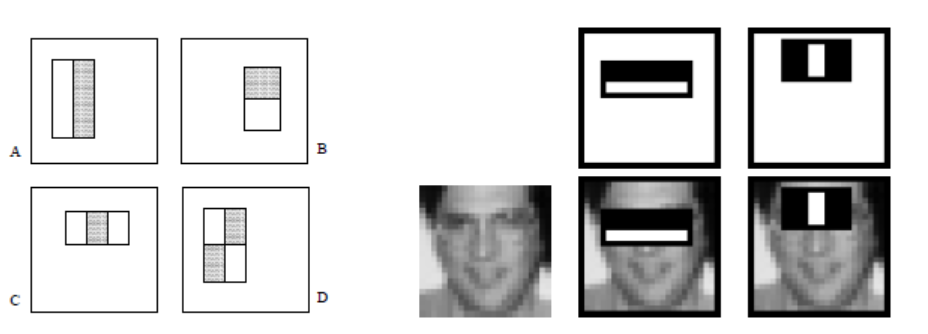
* 사람의 얼굴에는 부위별로 생기는 명암차이의 패턴을 구한다. 
* 사람의 얼굴에서 눈코입 위치는 크게 차이가 없으므로, 분포에 따른 명암 차이도 크지 않을 것\
* 밝은영역 - 어두운 영역 < 경계값(threshold) => 얼굴로 판단



### Harr Cascades를 이용한 얼굴 검출 CODE

얼굴의 좌표 = 141 125 373 373


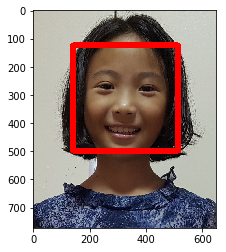

In [5]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontface.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("img/girl_face.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("실패")
    quit()
# 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 예제) cascade를 이용하여, 얼굴을 검출해서 자동으로 모자이크 처리하기 (사각형은 그릴필요없음)

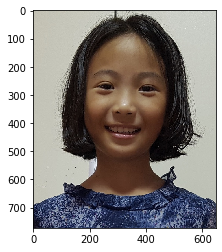

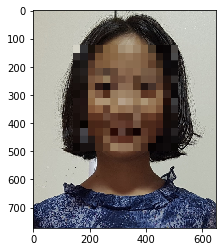

In [187]:
import matplotlib.pyplot as plt

def mosaic(img, vertex_list, rate=30):
    
    (x1, y1, w, h) = vertex_list
    x2 = x1 + w
    y2 = y1 + h
    i_roi = img[y1:y2, x1:x2]
    
    i_small = cv2.resize(i_roi, (w//rate, h//rate))
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

img = cv2.imread("img/girl_face.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


cascade_file = "haarcascade_frontface.xml"
cascade = cv2.CascadeClassifier(cascade_file) # 캐스케이드 파일 지정해서 검출기 생성 
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 얼굴 인식하기

# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("실패")
    quit()



img2 = mosaic(img, face_list.reshape(4), rate=25)


# 이미지 출력하기
# cv2.imwrite("face-detect.png", img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()